In [1]:
import tushare as ts
import pandas  as pd
import numpy  as np
import matplotlib.pyplot as plt
from   pylab  import  *

# 复权数据分析。

In [3]:
df = ts.get_h_data('300036')

[Getting data:]<urlopen error [Errno -3] Temporary failure in name resolution>
<urlopen error [Errno -3] Temporary failure in name resolution>
<urlopen error [Errno -3] Temporary failure in name resolution>


OSError: 获取失败，请检查网络.

In [ ]:
df

In [4]:
df.tail()

open   high  close    low     volume       amount
date                                                          
2017-08-04  15.18  15.54  15.31  15.16  6978159.0  111846017.0
2017-08-03  15.14  15.63  15.30  15.06  8161899.0  131531635.0
2017-08-02  15.53  15.60  15.12  15.11  6877974.0  110075170.0
2017-08-01  15.66  15.66  15.52  15.34  5970274.0   96566296.0
2017-07-31  15.46  15.81  15.64  15.23  8151732.0  132684083.0

In [7]:
def splot(dfx):
    fig=plt.figure(figsize=(48,4), dpi=80)
    p1=fig.add_subplot(1,1,1)

    p1.plot(dfx.index,dfx['open'])
    p1.plot(dfx.index,dfx['close'])
    p1.plot(dfx.index,dfx['high'])
    p1.plot(dfx.index,dfx['low'])
    plt.grid(True)
    plt.gcf().autofmt_xdate()
    plt.show()
    
def splotbar(dfx):
    fig=plt.figure(figsize=(48,4), dpi=80)
    p1=fig.add_subplot(1,1,1)

    p1.plot(dfx.index,dfx['p_change'], color='red')
    p1.bar(dfx.index,dfx['price_change'])
    plt.grid(True)
    plt.gcf().autofmt_xdate()
    plt.show()    

### 最近一年的复权数据绘图。

In [9]:
df2=df["2018-08-01":"2017-07-01"].sort_index(ascending=True)

In [13]:
df2.T

date      2017-07-31   2017-08-01    2017-08-02    2017-08-03    2017-08-04  \
open    1.530000e+01        15.48  1.536000e+01  1.497000e+01  1.501000e+01   
high    1.564000e+01        15.48  1.543000e+01  1.546000e+01  1.537000e+01   
close   1.547000e+01        15.35  1.495000e+01  1.513000e+01  1.514000e+01   
low     1.507000e+01        15.17  1.495000e+01  1.490000e+01  1.499000e+01   
volume  8.151732e+06   5970274.00  6.877974e+06  8.161899e+06  6.978159e+06   
amount  1.326841e+08  96566296.00  1.100752e+08  1.315316e+08  1.118460e+08   

date     2017-08-07    2017-08-08    2017-08-09    2017-08-10    2017-08-11  \
open          15.09  1.537000e+01  1.558000e+01  1.584000e+01  1.580000e+01   
high          15.48  1.557000e+01  1.632000e+01  1.627000e+01  1.644000e+01   
close         15.28  1.550000e+01  1.593000e+01  1.605000e+01  1.583000e+01   
low           15.05  1.516000e+01  1.554000e+01  1.562000e+01  1.573000e+01   
volume   5714496.00  8.826456e+06  1.928638e+07  1.527504e+07  1.629621e+07   
amount  92470796.00  1.436639e+08  3.256994e+08  2.584268e+08  2.770394e+08   

date        ...         2018-07-17    2018-07-18    2018-07-19    2018-07-20  \
open        ...       1.995000e+01  1.997000e+01  1.930000e+01  2.021000e+01   
high        ...       2.011000e+01  2.006000e+01  2.046000e+01  2.220000e+01   
close       ...       2.010000e+01  1.939000e+01  2.019000e+01  2.220000e+01   
low         ...       1.899000e+01  1.939000e+01  1.908000e+01  1.956000e+01   
volume      ...       1.753198e+07  1.203053e+07  2.371800e+07  2.852179e+07   
amount      ...       3.594879e+08  2.491947e+08  4.991346e+08  6.415638e+08   

date      2018-07-23    2018-07-24    2018-07-25    2018-07-26    2018-07-27  \
open    2.281000e+01  2.299000e+01  2.277000e+01  2.267000e+01  2.063000e+01   
high    2.341000e+01  2.317000e+01  2.324000e+01  2.267000e+01  2.135000e+01   
close   2.328000e+01  2.288000e+01  2.295000e+01  2.097000e+01  2.081000e+01   
low     2.247000e+01  2.241000e+01  2.235000e+01  2.079000e+01  2.039000e+01   
volume  3.949990e+07  3.089895e+07  3.089174e+07  3.806295e+07  2.014237e+07   
amount  9.523933e+08  7.407581e+08  7.401502e+08  8.610285e+08  4.424251e+08   

date      2018-07-30  
open    2.051000e+01  
high    2.100000e+01  
close   2.087000e+01  
low     2.044000e+01  
volume  1.328002e+07  
amount  2.892532e+08  

[6 rows x 245 columns]

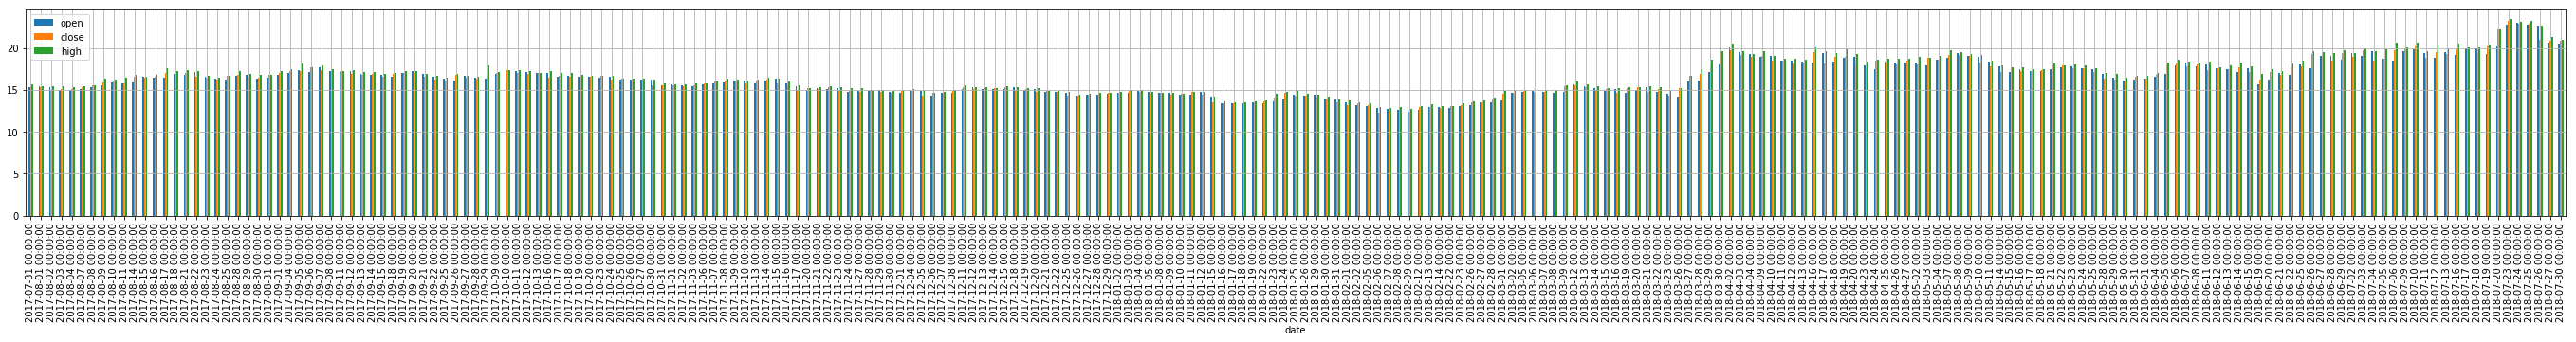

In [12]:
dfy3fq = pd.DataFrame(df2,columns=("open","close","high")).sort_index(ascending=True)
dfy3fq.plot(kind='bar',figsize=(48,4),grid=True)

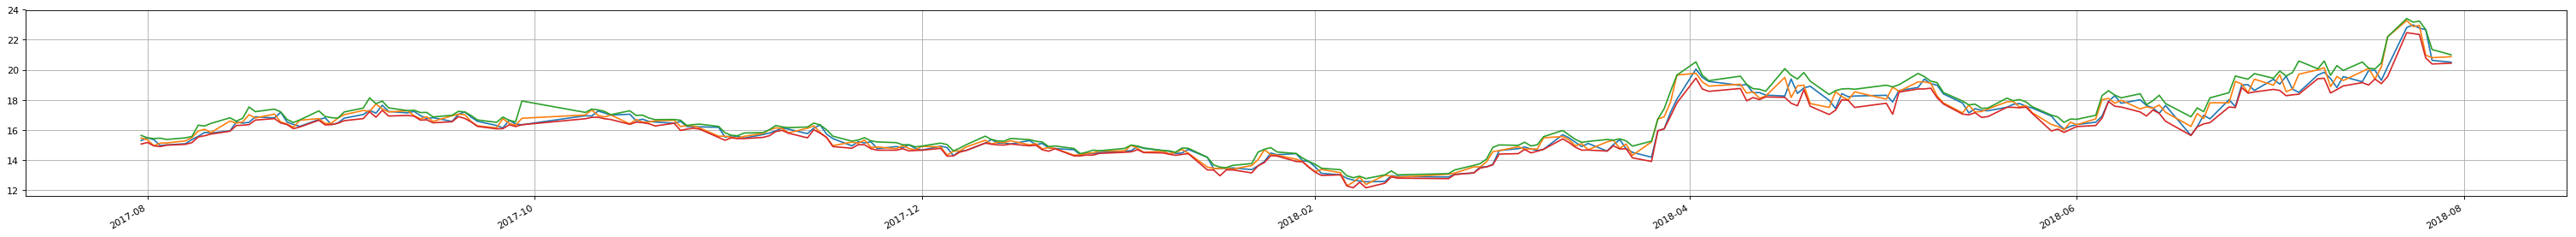

In [15]:
splot(df2)

KeyError: 'p_change'

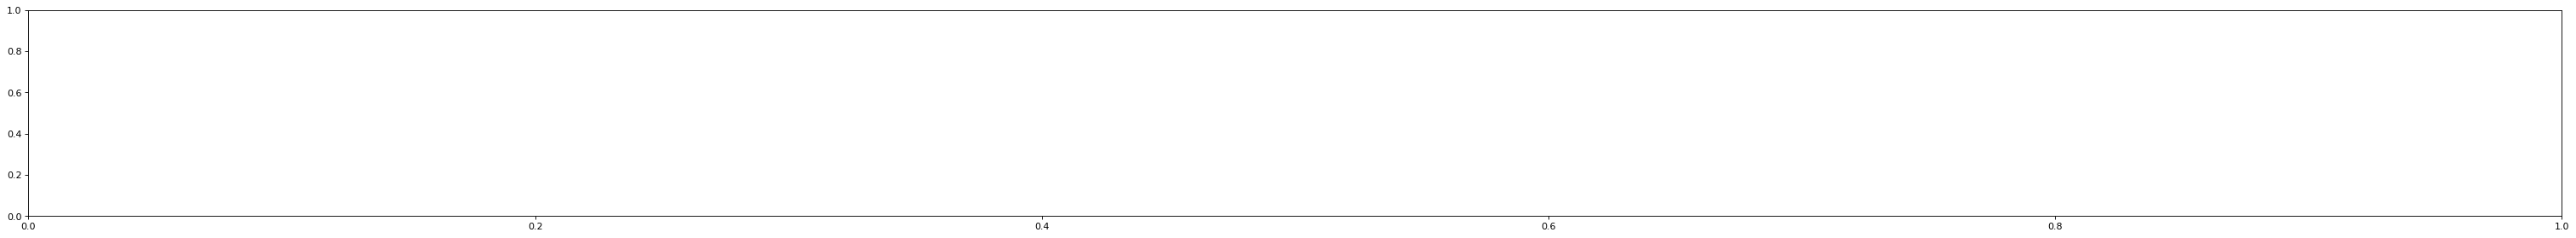

In [16]:
splotbar(df2)

In [8]:
def getYear(year=2018):
    dfy = ts.get_h_data('300036', start=str(year)+"-01-01", end=str(year+1)+"-01-01")
    dfy = dfy.sort_index(ascending=True)
    return dfy

def plotYear(year=2018):
    dfy = getYear(year)
    splot(dfy)
    return dfy

[Getting data:]####

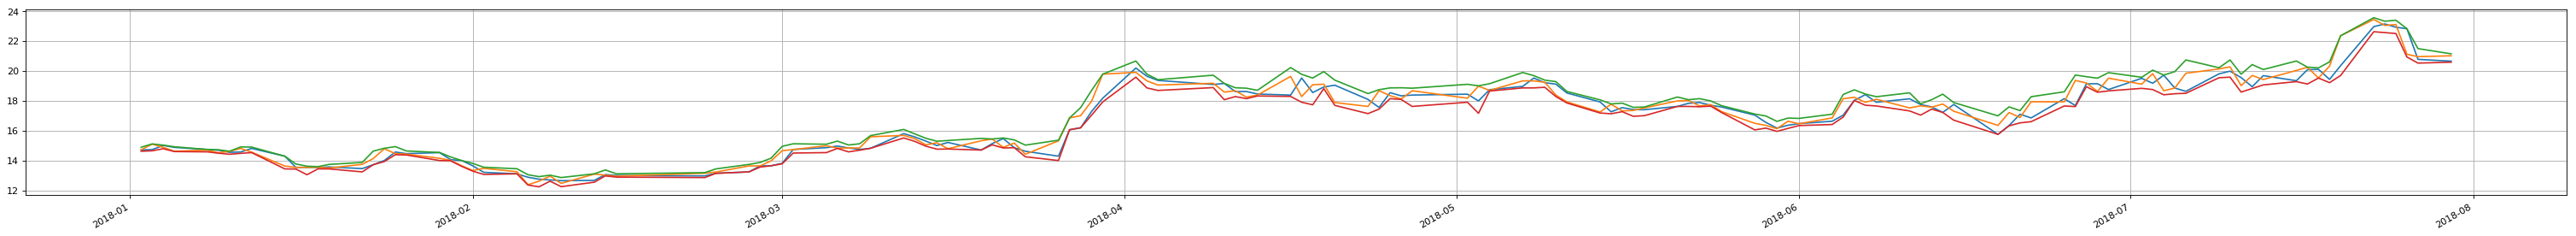

In [11]:
dfyfq2018=plotYear(2018)

[Getting data:]####

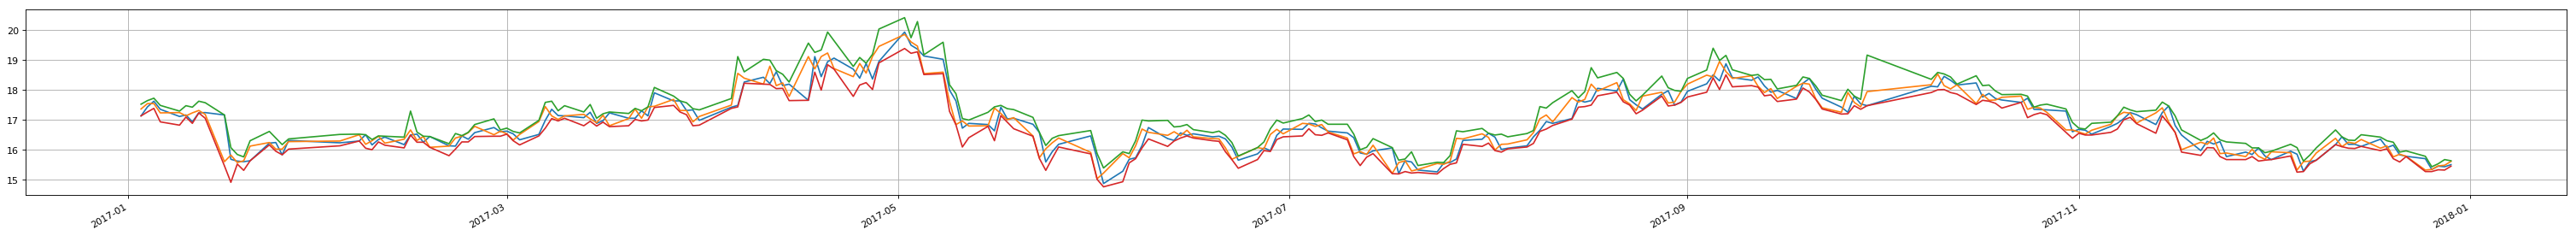

In [10]:
dfyfq2017=plotYear(2017)

[Getting data:]####

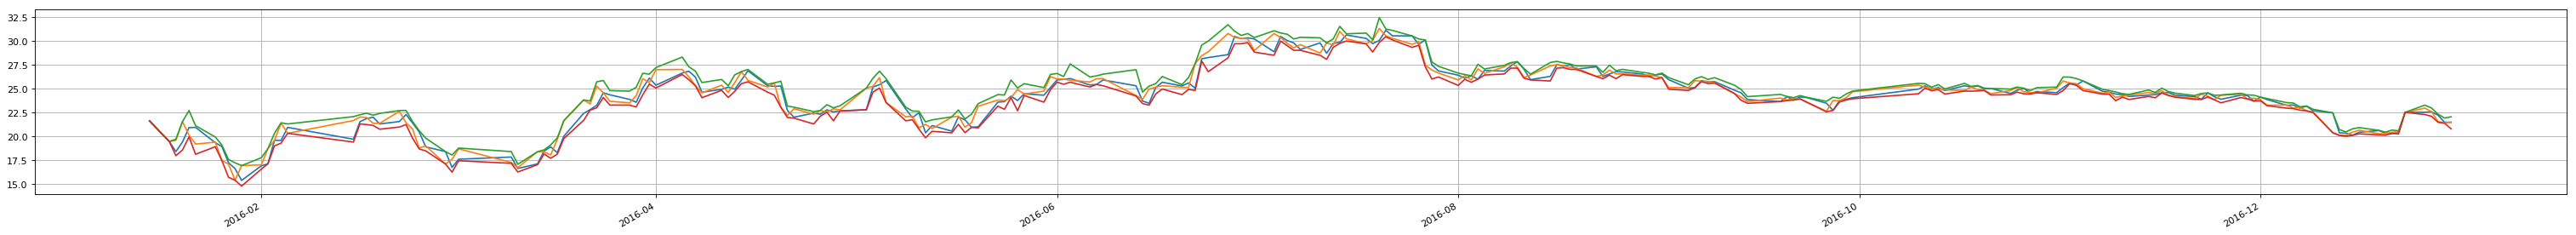

In [12]:
dfyfq2016=plotYear(2016)

[Getting data:]####

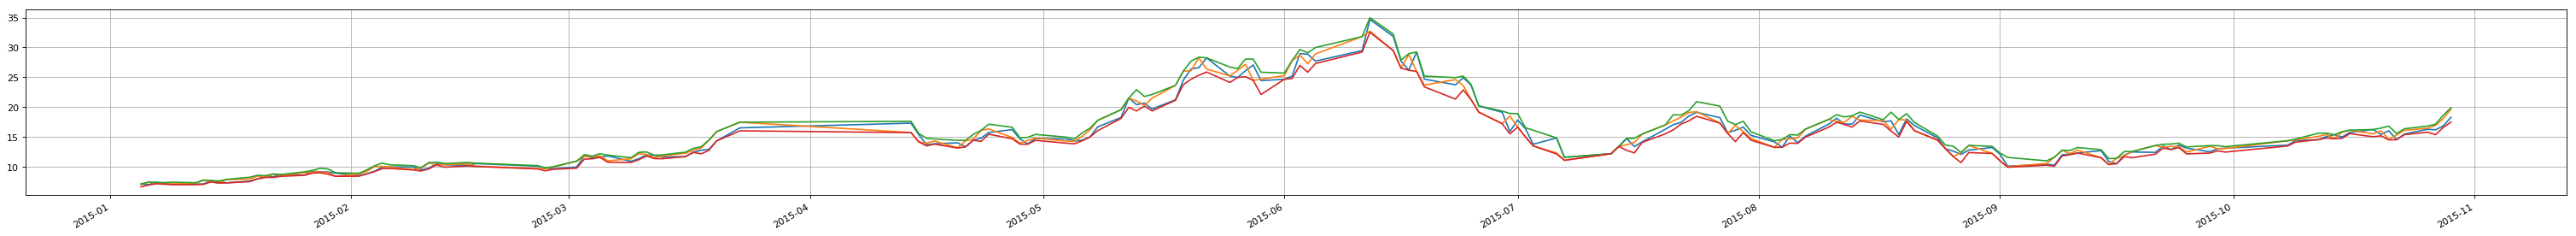

In [14]:
dfyfq2015=plotYear(2015)

[Getting data:]####

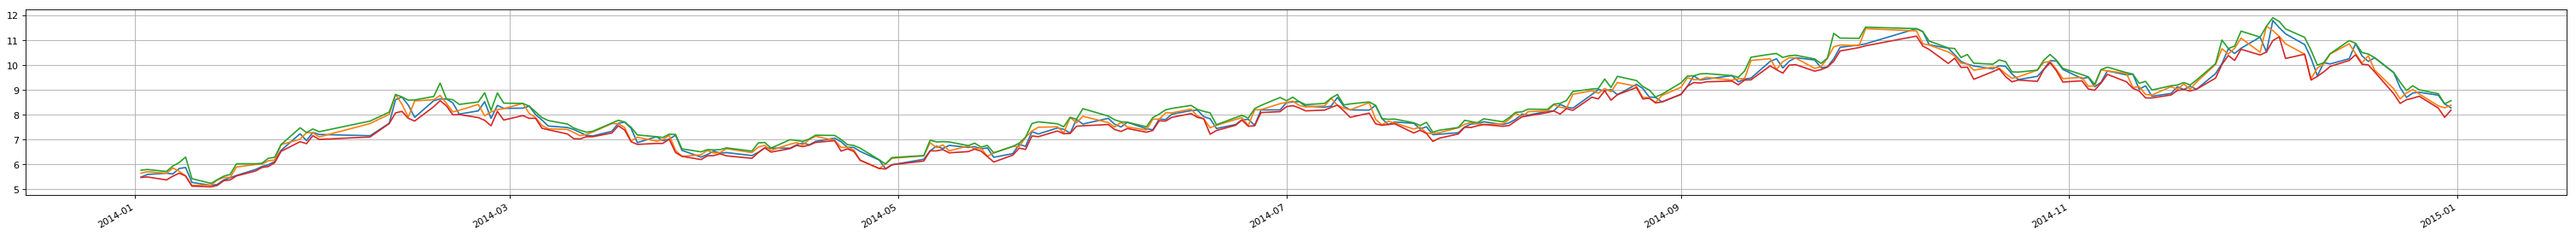

In [16]:
dfyfq2014=plotYear(2014)

[Getting data:]####

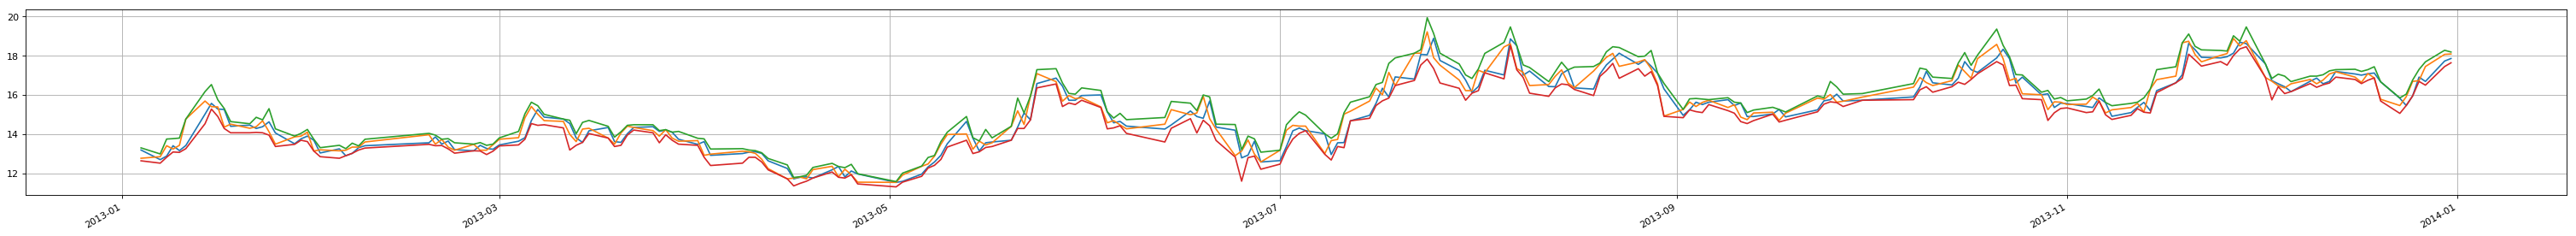

In [17]:
dfyfq2013=plotYear(2013)

[Getting data:]####

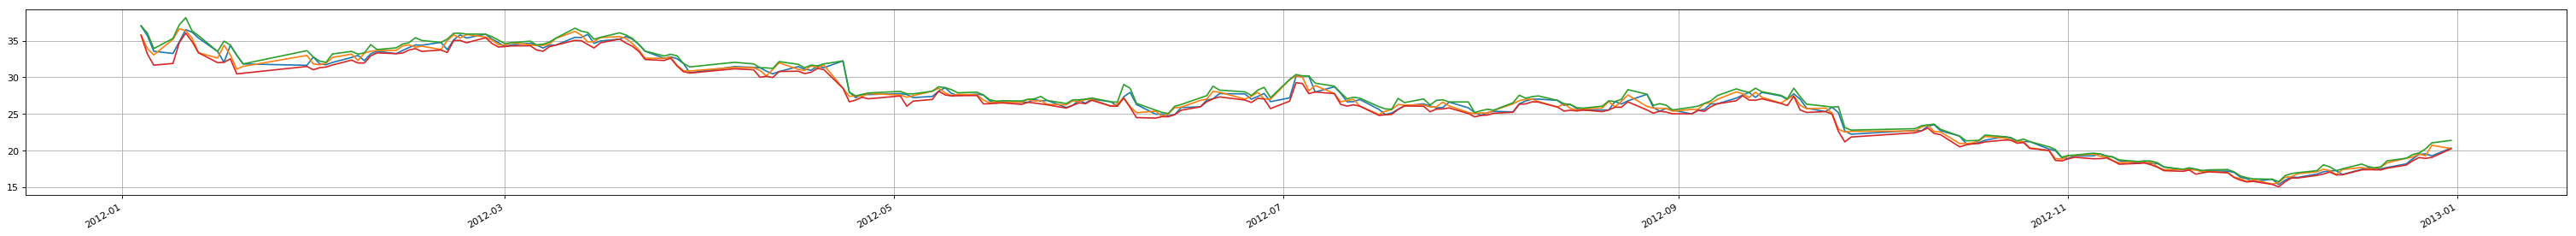

In [18]:
dfyfq2012=plotYear(2012)

[Getting data:]####

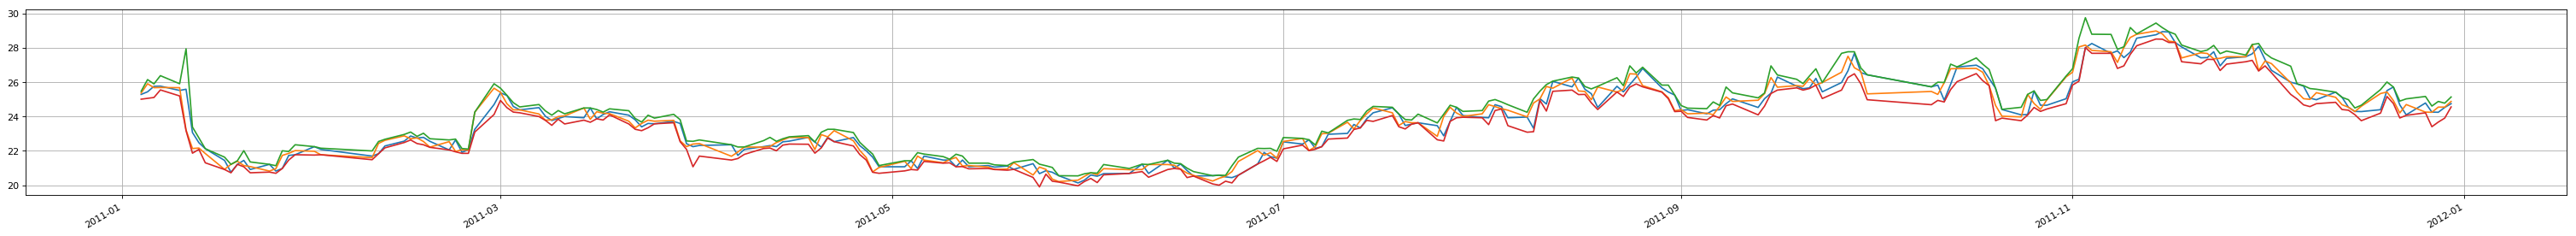

In [19]:
dfyfq2011=plotYear(2011)

[Getting data:]####

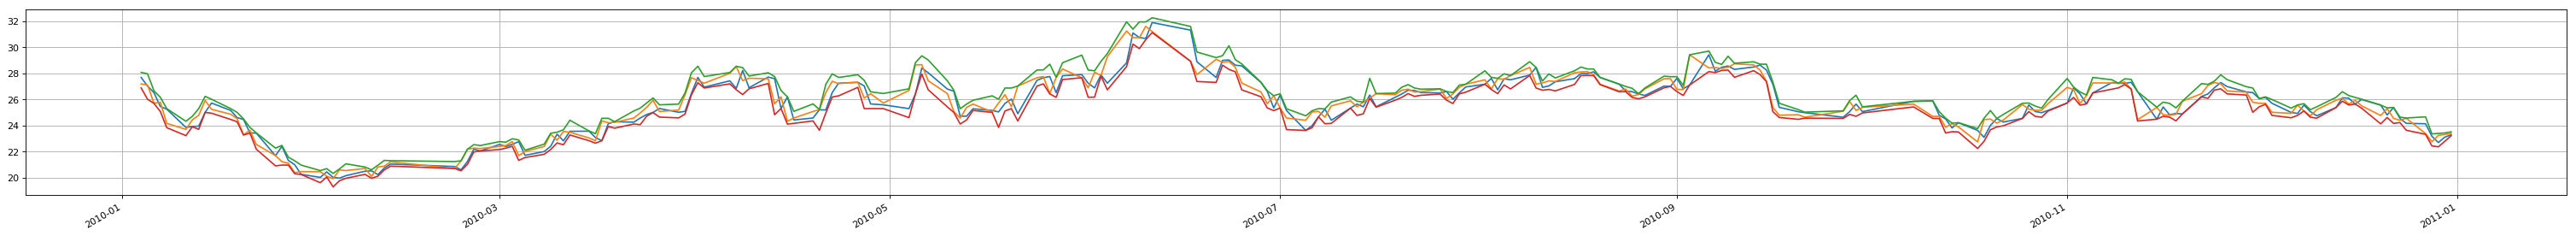

In [20]:
dfyfq2010=plotYear(2010)

[Getting data:]####

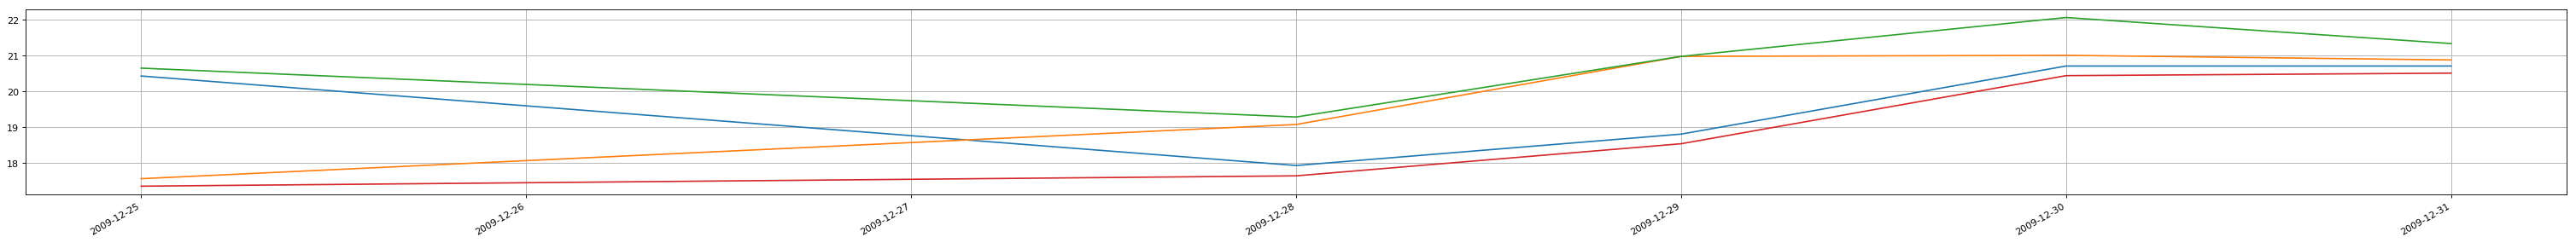

In [21]:
dfyfq2009=plotYear(2009)